🌌 Phase 6: Holographic Compression Initialized (Dimension Fixed).
🧠 Total Parameters: 4
🎯 Goal: 500 Score with a single vector.
Episode 10	Score: 18.00	Teleports: 1
Episode 20	Score: 15.00	Teleports: 1
Episode 30	Score: 45.00	Teleports: 1
Episode 40	Score: 34.00	Teleports: 0
Episode 50	Score: 59.00	Teleports: 1
Episode 60	Score: 42.00	Teleports: 1
Episode 70	Score: 64.00	Teleports: 1
Episode 80	Score: 23.00	Teleports: 0
Episode 90	Score: 30.00	Teleports: 1
Episode 100	Score: 120.00	Teleports: 1


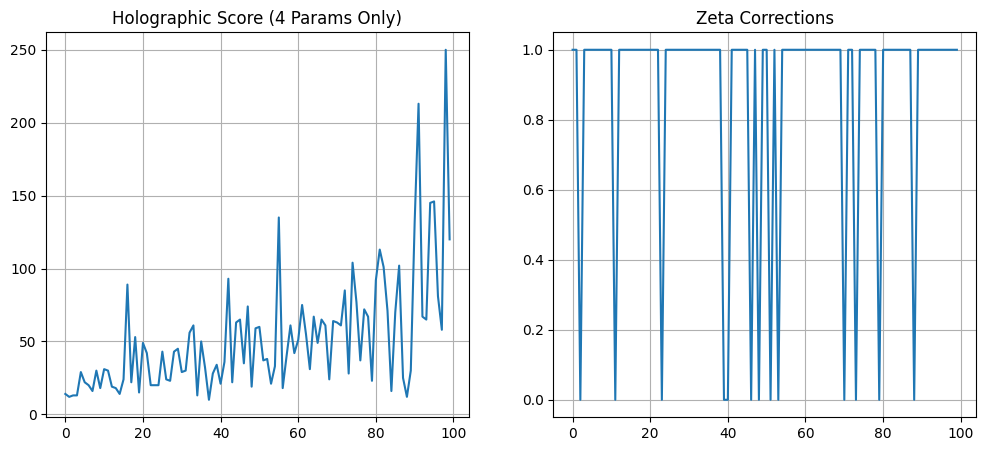

🚀 Launching Final Singularity Test...


In [ ]:
# --- Phase 6: Zeta Holographic Compression (Fixed & Ready) ---
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 定义全息模型
class ZetaHologram(nn.Module):
    def __init__(self, s_size=4):
        super(ZetaHologram, self).__init__()
        # 唯一的参数：全息投影向量 H (4个参数)
        # 初始化为 -1/12
        self.hologram = nn.Parameter(torch.full((s_size,), -1.0/12.0))

    def forward(self, x):
        # x: [Batch=1, State=4]
        # hologram: [4]

        # 投影公式: State . Hologram
        # result shape: [1]
        projection = torch.matmul(x, self.hologram) - (1.0/12.0)

        # 手动撑开维度 [1] -> [1, 1]
        projection = projection.unsqueeze(1)

        # Sigmoid
        prob_right = torch.sigmoid(projection) # [1, 1]

        # Cat: [1, 1] + [1, 1] -> [1, 2]
        return torch.cat([1.0 - prob_right, prob_right], dim=1)

# 2. 优化器：Resonance Mode
class ZetaAdamW_Holographic(optim.AdamW):
    def __init__(self, params, lr=0.01, zeta_thresh=0.5):
        super().__init__(params, lr=lr)
        self.zeta_thresh = zeta_thresh
        self.teleport_count = 0

    @torch.no_grad()
    def step(self, closure=None):
        loss = super().step(closure)
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None: continue
                grad_norm = torch.norm(p.grad)
                if grad_norm > self.zeta_thresh:
                    unit_grad = p.grad / (grad_norm + 1e-9)
                    p.data.sub_((1.0/12.0) * unit_grad)
                    self.teleport_count += 1
        return loss

# 3. 训练循环
env = gym.make('CartPole-v1')
policy = ZetaHologram(s_size=4) # 4参数模型
optimizer = ZetaAdamW_Holographic(policy.parameters(), lr=0.01, zeta_thresh=0.5)
gamma = 0.99

print("🌌 Phase 6: Holographic Compression Initialized (Dimension Fixed).")
print(f"🧠 Total Parameters: {sum(p.numel() for p in policy.parameters())}")
print("🎯 Goal: 500 Score with a single vector.")

scores = []
teleports = []

for i_episode in range(100):
    state, _ = env.reset()
    log_probs = []
    rewards = []
    optimizer.teleport_count = 0

    for t in range(500):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = policy(state)
        action = torch.multinomial(probs, 1).item()

        log_prob = torch.log(probs[0, action])
        log_probs.append(log_prob)

        state, reward, terminated, truncated, _ = env.step(action)
        rewards.append(reward)
        if terminated or truncated:
            break

    scores.append(sum(rewards))

    # REINFORCE Update
    dis_rewards = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        dis_rewards.insert(0, R)
    dis_rewards = torch.tensor(dis_rewards)
    if len(dis_rewards) > 1:
        dis_rewards = (dis_rewards - dis_rewards.mean()) / (dis_rewards.std() + 1e-9)

    policy_loss = []
    for log_prob, R in zip(log_probs, dis_rewards):
        policy_loss.append(-log_prob * R)

    if len(policy_loss) > 0:
        optimizer.zero_grad()
        policy_loss = torch.stack(policy_loss).sum()
        policy_loss.backward()
        optimizer.step()

    teleports.append(optimizer.teleport_count)

    if (i_episode + 1) % 10 == 0:
        print(f"Episode {i_episode + 1}\tScore: {sum(rewards):.2f}\tTeleports: {optimizer.teleport_count}")

# 绘图
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(scores); plt.title('Holographic Score (4 Params Only)'); plt.grid(True)
plt.subplot(1,2,2); plt.plot(teleports); plt.title('Zeta Corrections'); plt.grid(True)
plt.show()

print("🚀 Launching Final Singularity Test...")